# Evaluation Metrics

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# Loading dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Ataullha/CSE476-Machine-Learning-Lab/main/heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [9]:
y[:5]

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [10]:
X[:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [11]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
X[['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [13]:
oe = OrdinalEncoder()

In [14]:
X[['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']] = oe.fit_transform(X[['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']])

In [15]:
X[:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[:5]

array([[0.55102041, 0.        , 0.33333333, 0.66      , 0.56716418,
        0.        , 0.5       , 0.78518519, 0.        , 0.46341463,
        1.        ],
       [0.71428571, 1.        , 0.        , 0.8       , 0.44278607,
        1.        , 1.        , 0.20740741, 1.        , 0.56097561,
        0.5       ],
       [0.26530612, 1.        , 0.        , 0.75      , 0.28358209,
        0.        , 0.5       , 0.5037037 , 1.        , 0.5       ,
        0.5       ],
       [0.67346939, 1.        , 1.        , 0.67      , 0.3880597 ,
        0.        , 0.5       , 0.62962963, 0.        , 0.63414634,
        0.5       ],
       [0.69387755, 1.        , 0.66666667, 0.665     , 0.        ,
        1.        , 1.        , 0.43703704, 1.        , 0.46341463,
        0.5       ]])

In [19]:
X_test[:5]

array([[0.6122449 , 1.        , 0.        , 0.8       , 0.42454395,
        1.        , 0.        , 0.39259259, 1.        , 0.43902439,
        1.        ],
       [0.85714286, 1.        , 0.        , 0.65      , 0.53399668,
        0.        , 0.        , 0.36296296, 0.        , 0.6097561 ,
        0.5       ],
       [0.14285714, 0.        , 1.        , 0.6       , 0.26533997,
        0.        , 1.        , 0.92592593, 0.        , 0.31707317,
        1.        ],
       [0.67346939, 1.        , 0.        , 0.67      , 0.        ,
        1.        , 1.        , 0.19259259, 0.        , 0.5       ,
        0.5       ],
       [0.63265306, 1.        , 0.        , 0.82      , 0.29187396,
        1.        , 0.        , 0.22222222, 0.        , 0.43902439,
        0.5       ]])

# Model

In [23]:
model = SVC(kernel='linear')

In [24]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
model.score(X_test, y_test)

0.8768115942028986

In [27]:
y_pred = model.predict(X_test)

# Evaluation

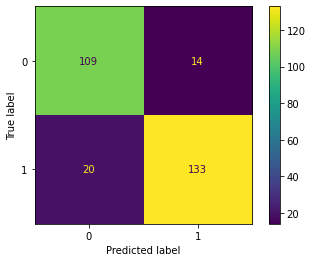

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [34]:
# import seaborn as sns

# sns.heatmap(cm, annot=True, fmt='.0f')

In [35]:
accuracy_score(y_test, y_pred)

0.8768115942028986

In [36]:
precision_score(y_test, y_pred)

0.9047619047619048

In [37]:
recall_score(y_test, y_pred)

0.869281045751634

In [38]:
f1_score(y_test, y_pred)

0.8866666666666667

In [39]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       123
           1       0.90      0.87      0.89       153

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [40]:
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

In [41]:
fpr

array([0.        , 0.        , 0.        , 0.00813008, 0.00813008,
       0.01626016, 0.01626016, 0.02439024, 0.02439024, 0.03252033,
       0.03252033, 0.04065041, 0.04065041, 0.04878049, 0.04878049,
       0.05691057, 0.05691057, 0.06504065, 0.06504065, 0.07317073,
       0.07317073, 0.08130081, 0.08130081, 0.08943089, 0.08943089,
       0.09756098, 0.09756098, 0.10569106, 0.10569106, 0.11382114,
       0.11382114, 0.16260163, 0.16260163, 0.17073171, 0.17073171,
       0.19512195, 0.19512195, 0.20325203, 0.20325203, 0.21138211,
       0.21138211, 0.24390244, 0.24390244, 0.28455285, 0.28455285,
       0.33333333, 0.33333333, 0.34146341, 0.34146341, 0.36585366,
       0.36585366, 0.39837398, 0.39837398, 0.40650407, 0.40650407,
       0.41463415, 0.41463415, 0.43902439, 0.43902439, 0.4796748 ,
       0.4796748 , 0.58536585, 0.58536585, 0.83739837, 0.83739837,
       1.        ])

In [42]:
tpr

array([0.        , 0.00653595, 0.02614379, 0.02614379, 0.11111111,
       0.11111111, 0.23529412, 0.23529412, 0.32026144, 0.32026144,
       0.39869281, 0.39869281, 0.45751634, 0.45751634, 0.50326797,
       0.50326797, 0.54901961, 0.54901961, 0.64052288, 0.64052288,
       0.7254902 , 0.7254902 , 0.73856209, 0.73856209, 0.79738562,
       0.79738562, 0.81699346, 0.81699346, 0.8496732 , 0.8496732 ,
       0.86928105, 0.86928105, 0.87581699, 0.87581699, 0.88235294,
       0.88235294, 0.88888889, 0.88888889, 0.89542484, 0.89542484,
       0.90849673, 0.90849673, 0.91503268, 0.91503268, 0.92810458,
       0.92810458, 0.93464052, 0.93464052, 0.94117647, 0.94117647,
       0.94771242, 0.94771242, 0.95424837, 0.95424837, 0.96078431,
       0.96078431, 0.97385621, 0.97385621, 0.98039216, 0.98039216,
       0.9869281 , 0.9869281 , 0.99346405, 0.99346405, 1.        ,
       1.        ])

In [43]:
thresholds

array([ 5.15790989e+00,  4.15790989e+00,  3.36746747e+00,  3.33250536e+00,
        2.52542198e+00,  2.50443118e+00,  2.01093292e+00,  2.00409195e+00,
        1.81673525e+00,  1.80846417e+00,  1.64504763e+00,  1.63567114e+00,
        1.43320951e+00,  1.43224612e+00,  1.37882795e+00,  1.37663435e+00,
        1.26071914e+00,  1.22671250e+00,  9.53112178e-01,  9.28502791e-01,
        7.01330727e-01,  5.95483122e-01,  5.67900879e-01,  5.58330935e-01,
        2.51237900e-01,  1.95393297e-01,  1.49552285e-01,  1.44788262e-01,
        3.72245311e-02,  1.67621965e-02,  1.92824522e-04, -1.62274316e-01,
       -2.07029986e-01, -2.23994449e-01, -2.46245367e-01, -3.41286309e-01,
       -3.42472501e-01, -3.48356885e-01, -3.52423532e-01, -3.86334899e-01,
       -4.06462544e-01, -4.56523949e-01, -4.61303351e-01, -4.82917771e-01,
       -4.91947586e-01, -5.85387926e-01, -5.99097851e-01, -6.24574212e-01,
       -6.25818961e-01, -6.78174496e-01, -7.21521361e-01, -7.72074858e-01,
       -7.73165049e-01, -

In [47]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.877729953770126

Text(0, 0.5, 'fpr')

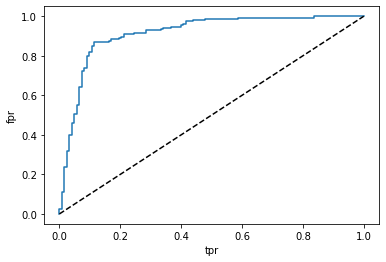

In [50]:
plt.plot(fpr, tpr, label='Roc curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('tpr')
plt.ylabel('fpr')
plt